## 1. Libraries and Data Import

In [232]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
import xgboost
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import plot_partial_dependence

from fastai.tabular.all import *
from fastbook import *

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

from dtreeviz.trees import *

In [26]:
df = pd.read_csv('train.csv', low_memory=False, index_col='Id')
test_df = pd.read_csv('test.csv', low_memory=False, index_col='Id')

In [3]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## 2. EDA

## 2.1 General

In [5]:
print ('Train:',df.shape[0],'rows, and',df.shape[1],'features')
print ('Test:',test_df.shape[0],'rows, and',test_df.shape[1],'features')

Train: 1460 rows, and 80 features
Test: 1459 rows, and 79 features


In [6]:
cont, cat = cont_cat_split(df, 1, dep_var='SalePrice')
print('Number of quantitative vars:',len(cont),', Number of categorical vars:',len(cat))
print('\nQuantitative vars:',cont)
print('\nCategorical vars:',cat)

Number of quantitative vars: 36 , Number of categorical vars: 43

Quantitative vars: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

Categorical vars: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electri

In [7]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 2.2 Missing Values

In [8]:
# Create table for missing data analysis
def missing_data_table(df):
    total = df.isnull().sum()
    total = total[total>0].sort_values(ascending=False)
    percent = (total/df.shape[0])*100
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

Text(0.5, 1.0, 'Missing Values: Categorical Training Variables')

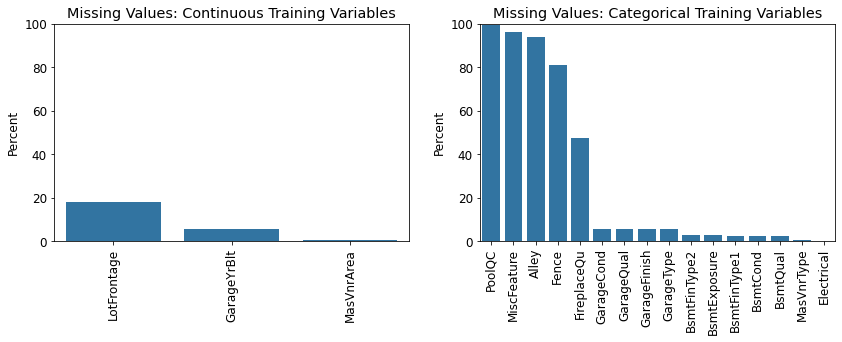

In [9]:
#train missing
fig, ax = plt.subplots(1,2, figsize=(14,4))

missing = missing_data_table(df[cont])
sns.barplot(x=missing.index, y=missing['Percent'], color='tab:blue', ax=ax[0])
ax[0].set_ylim([0, 100])
ax[0].tick_params('x', labelrotation=90)
ax[0].set_title('Missing Values: Continuous Training Variables')

missing = missing_data_table(df[cat])
sns.barplot(x=missing.index, y=missing['Percent'], color='tab:blue', ax=ax[1])
ax[1].set_ylim([0, 100])
ax[1].tick_params('x', labelrotation=90)
ax[1].set_title('Missing Values: Categorical Training Variables')

Text(0.5, 1.0, 'Missing Values: Categorical Test Variables')

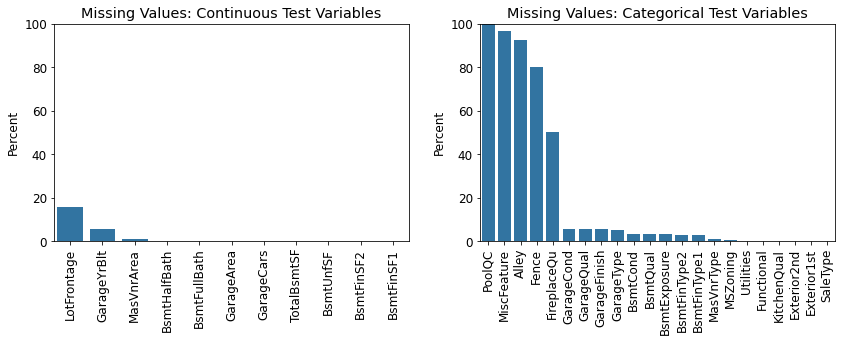

In [10]:
#test missing
fig, ax = plt.subplots(1,2, figsize=(14,4))

missing = missing_data_table(test_df[cont])
sns.barplot(x=missing.index, y=missing['Percent'], color='tab:blue', ax=ax[0])
ax[0].set_ylim([0, 100])
ax[0].tick_params(axis='x', labelrotation=90)
ax[0].set_title('Missing Values: Continuous Test Variables')

missing = missing_data_table(test_df[cat])
sns.barplot(x=missing.index, y=missing['Percent'], color='tab:blue', ax=ax[1])
ax[1].set_ylim([0, 100])
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].set_title('Missing Values: Categorical Test Variables')

## 2.3 Target Univariate

Look at the plot and distribution of dependent variable

In [11]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

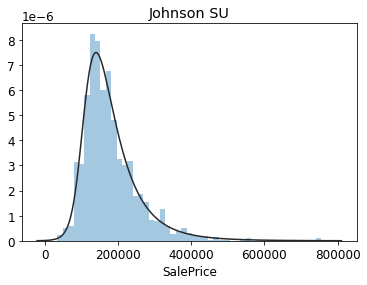

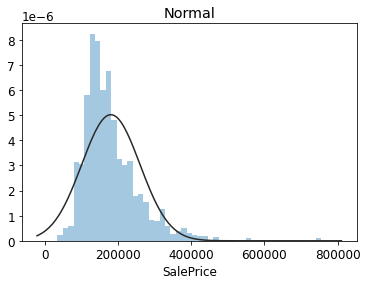

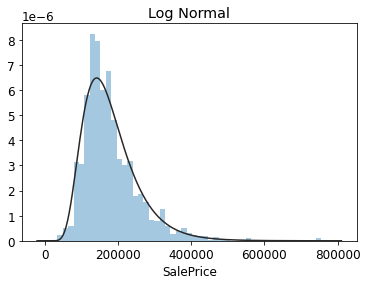

In [12]:
# Dependent var distribution
y = df['SalePrice']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)

## 2.4 Feature Importance (Baseline Model - RF)

This will help in foloowing ways 
- Provide a baseline model
- Give insights about data, and help in understanding the variables better
- We can extract important features and possibly remove redundant variables

### 2.4.1 Data Pre-Processing 

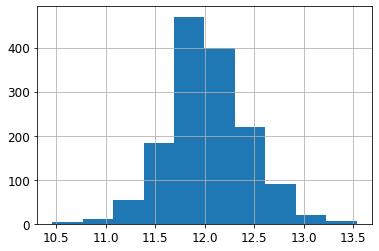

In [27]:
df['SalePrice'] = np.log(df['SalePrice'])
df['SalePrice'].hist()

In [14]:
def processing_pass1(df):
    qual_order = 'Po', 'Fa', 'TA', 'Gd', 'Ex'
    exp_order = 'No', 'Mn', 'Av', 'Gd'
    bsmt_finish_order = 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'
    garage_finish_order = 'Unf', 'RFn', 'Fin'

    df['BsmtExposure'] = df['BsmtExposure'].astype('category')
    df['BsmtExposure'].cat.set_categories(exp_order, ordered=True, inplace=True)

    df['BsmtFinType1'] = df['BsmtFinType1'].astype('category') 
    df['BsmtFinType1'].cat.set_categories(bsmt_finish_order, ordered=True, inplace=True)

    df['BsmtFinType2'] = df['BsmtFinType2'].astype('category') 
    df['BsmtFinType2'].cat.set_categories(bsmt_finish_order, ordered=True, inplace=True)

    df['GarageFinish'] = df['GarageFinish'].astype('category')
    df['GarageFinish'].cat.set_categories(garage_finish_order, ordered=True, inplace=True)

    df['LotShape'] = df['LotShape'].astype('category')
    df['LotShape'].cat.set_categories(['IR1','IR2','IR3'], ordered=True, inplace=True)

    df['LandSlope'] = df['LandSlope'].astype('category')
    df['LandSlope'].cat.set_categories(['Gtl','Mod','Sev'], ordered=True, inplace=True)

    df['Fence'] = df['Fence'].astype('category')
    df['Fence'].cat.set_categories(['MnWw','GdWo','MnPrv','GdPrv'], ordered=True, inplace=True)

    qual_var_list = ['ExterQual','ExterCond','BsmtQual','BsmtCond','KitchenQual','HeatingQC','FireplaceQu',
                     'GarageQual','GarageCond','PoolQC']
    for var in qual_var_list:
        df[var] = df[var].astype('category')
        df[var].cat.set_categories(qual_order, ordered=True, inplace=True)  

    #Missing treatment
    #Creating features based on high missing vars, and will drop the actual var post this
    df['PoolFlag'] = np.where(df['PoolQC'].isnull(),1,0)
    df['ElevatorFlag'] = np.where(df['MiscFeature']=='Elevator',1,0)
    df['TennisCourtFlag'] = np.where(df['MiscFeature']=='TenC',1,0)

    #GarageYrBuilt is missing for houses where there is no garage, 
    #hence it makes sense to replace is with 0 rather than using some other imputing strategy
    df.loc[df['GarageYrBlt'].isnull(),'GarageYrBlt'] = 0

    missing_vars = ['PoolQC','MiscFeature']
    df.drop(columns=missing_vars, inplace=True)
    
    return df

In [171]:
df1 = processing_pass1(df.copy())
cont, cat = cont_cat_split(df1, 1, dep_var='SalePrice')
procs = [Categorify, FillMissing]

In [172]:
to = TabularPandas(df1, procs, cat, cont, y_names='SalePrice')
xs, y = to.train.xs, to.train.y
xs.shape, y.shape

((1460, 82), (1460,))

### 2.4.2 Model Training

In [153]:
def rmse(y_true, y_pred):
    return round(np.sqrt(((y_true-y_pred)**2).mean()),6)

def m_rmse(m, xs, y):
    return rmse(y, m.predict(xs))

In [188]:
rf1 = RandomForestRegressor(n_estimators=300, max_features=0.6, random_state=0, oob_score=True)
rf1.fit(xs, y)
m_rmse(rf1, xs, y), rmse(y, rf1.oob_prediction_)

(0.050175, 0.136746)

### 2.4.3 Feature Importance

In [34]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}).sort_values('imp', ascending=False)

In [35]:
fi = rf_feat_importance(rf1, xs)
fi[:10]

,cols,imp
47,OverallQual,0.357111
59,GrLivArea,0.130305
18,ExterQual,0.093435
49,YearBuilt,0.042429
55,TotalBsmtSF,0.041650
69,GarageCars,0.039724
56,1stFlrSF,0.029131
70,GarageArea,0.026758
30,KitchenQual,0.022174
52,BsmtFinSF1,0.016871


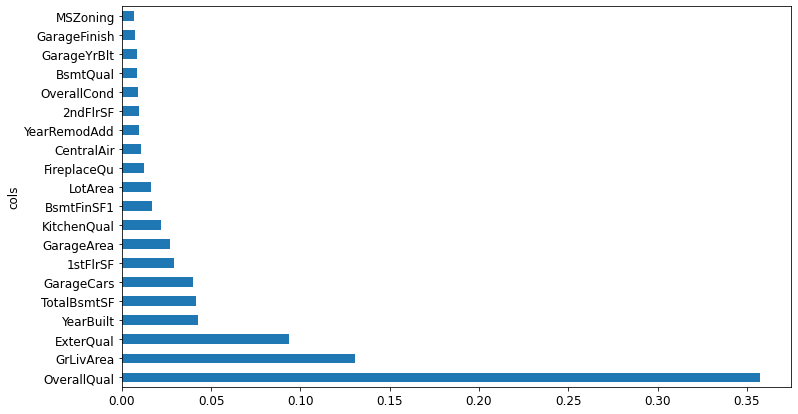

In [36]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:20])

In [39]:
non_imp_vars = list(fi[fi['imp']<=0.005]['cols'])

## 2.5 Variable Correlations

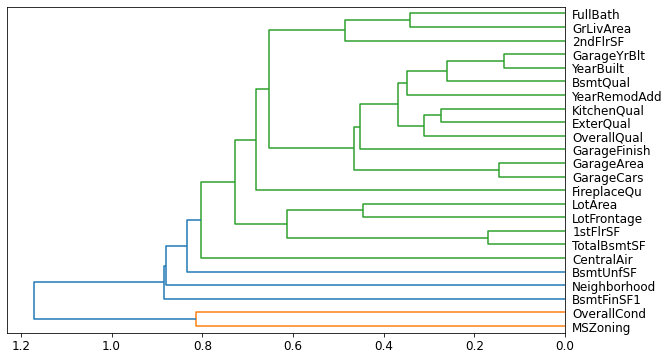

In [40]:
def cluster_columns(df, figsize=(10,6), font_size=12):
    corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
    corr_condensed = hc.distance.squareform(1-corr)
    z = hc.linkage(corr_condensed, method='average')
    fig = plt.figure(figsize=figsize)
    hc.dendrogram(z, labels=list(df.columns), orientation='left', leaf_font_size=font_size)
    plt.show()
cluster_columns(xs.drop(columns=non_imp_vars))

In [46]:
#GarageYrBuilt dropped as YrBuilt is more important
#GarageArea dropped as GarageCars is more important
#1stFlrSF dropped as TotalBsmtSF is more important
correlated_vars = ['GarageYrBlt','GarageArea','1stFlrSF','BsmtQual','KitchenQual','ExterQual']
#correlated_vars = ['GarageYrBlt','GarageArea','BsmtQual','KitchenQual','ExterQual']

In [51]:
# VIF calucation

# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor    

# imp point - this function expects the intercept term and doesnt add it automatically, 
# hence values will be wrong if only variables are passed

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

X = xs.copy()
X['const'] = 1
vifs = calc_vif(X.drop(columns=non_imp_vars+correlated_vars+['2ndFlrSF','BsmtUnfSF']))
vifs.sort_values(by='VIF', ascending=False)

,variables,VIF
16,const,20220.881007
9,YearBuilt,3.732323
7,OverallQual,3.032063
13,GrLivArea,2.784527
14,FullBath,2.285027
10,YearRemodAdd,2.077952
12,TotalBsmtSF,2.067751
15,GarageCars,2.028169
4,GarageFinish,2.001152
8,OverallCond,1.588722


In [52]:
correlated_vars = correlated_vars + ['2ndFlrSF','BsmtUnfSF']
print(correlated_vars)

['GarageYrBlt', 'GarageArea', '1stFlrSF', 'BsmtQual', 'KitchenQual', 'ExterQual', '2ndFlrSF', 'BsmtUnfSF']


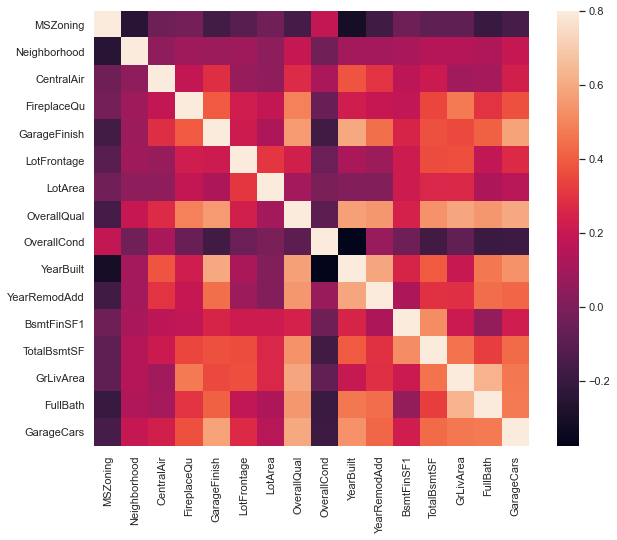

In [213]:
#correlation matrix
corrmat = xs.drop(columns=non_imp_vars+correlated_vars).corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, square=True)

## 2.6 Bivariate Plots

In [74]:
final_var_list = list(xs.drop(columns=non_imp_vars+correlated_vars).columns)
print(len(final_var_list), final_var_list)

16 ['MSZoning', 'Neighborhood', 'CentralAir', 'FireplaceQu', 'GarageFinish', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'GarageCars']


In [97]:
cont, cat = cont_cat_split(df[final_var_list], 10, dep_var='SalePrice')
print(cont, '\n', cat)

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea'] 
 ['MSZoning', 'Neighborhood', 'CentralAir', 'FireplaceQu', 'GarageFinish', 'OverallQual', 'OverallCond', 'FullBath', 'GarageCars']


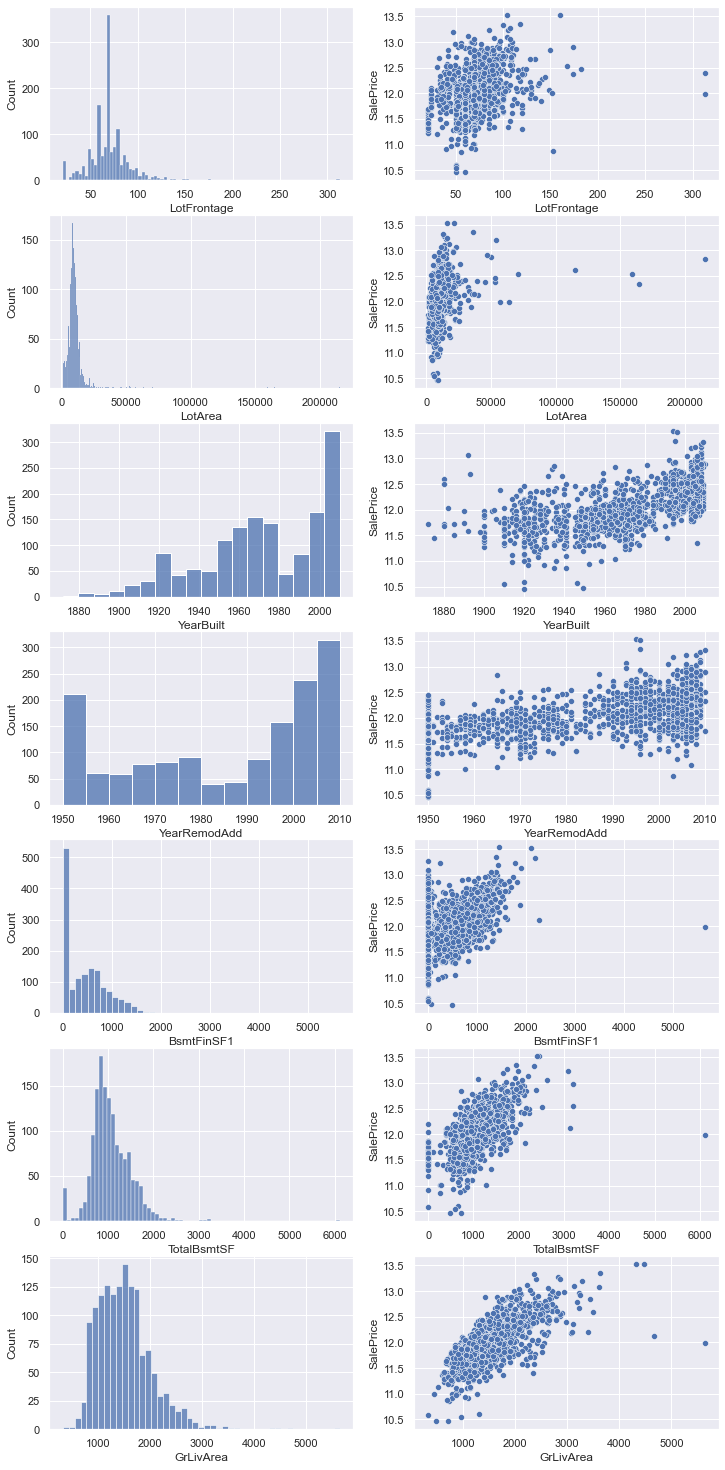

In [102]:
#continuous vars
i=1
plt.figure(figsize=(12,30))
for var in cont:
    plt.subplot(len(cont)+1, 2, i)
    sns.histplot(data=xs[var])
    plt.subplot(len(cont)+1, 2, i+1)
    sns.scatterplot(x=xs[var], y=df['SalePrice'])
    i=i+2

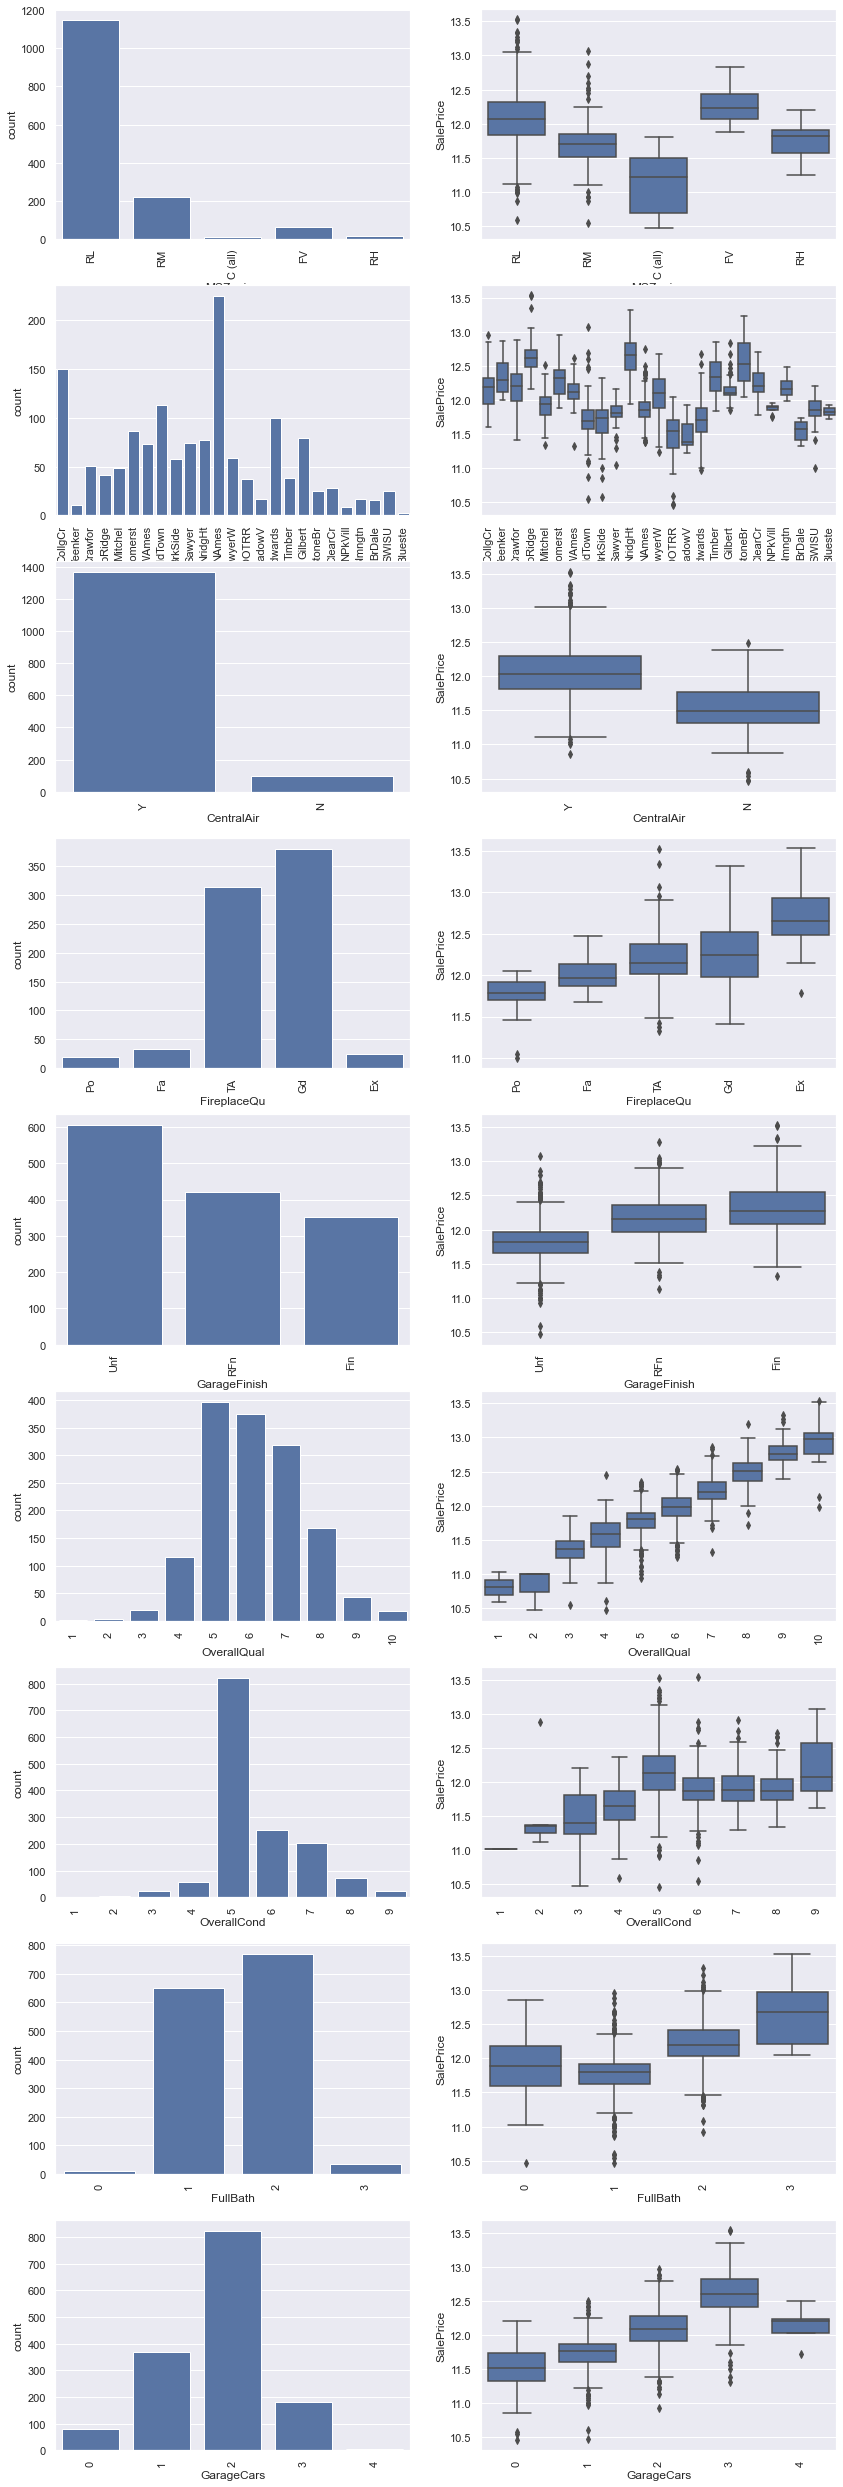

In [132]:
#categorical vars
i=1
plt.figure(figsize=(14,50))
for var in cat:
    plt.subplot(len(cat)+1, 2, i)
    sns.countplot(x=df1[var], color='b')
    plt.xticks(rotation=90)
    plt.subplot(len(cat)+1, 2, i+1)
    sns.boxplot(x=df1[var], y=df['SalePrice'], color='b')
    plt.xticks(rotation=90)
    i=i+2

Text(0.5, 1.0, 'log LotFrontage vs SalePrice')

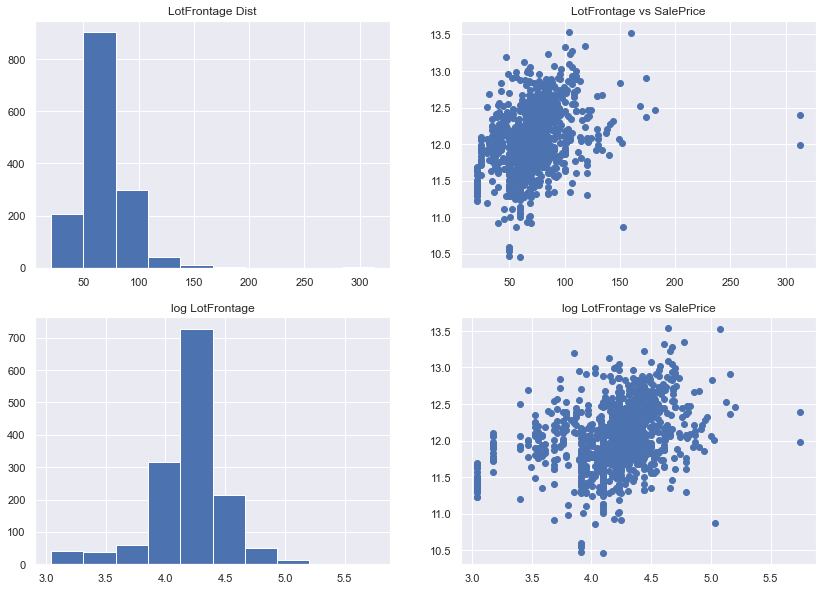

In [133]:
#Lot Frontage
fig, ax = plt.subplots(2,2, figsize=(14,10))
ax[0][0].hist(xs['LotFrontage'])
ax[0][0].set_title('LotFrontage Dist')
ax[0][1].scatter(x=xs['LotFrontage'], y=df['SalePrice'])
ax[0][1].set_title('LotFrontage vs SalePrice')
ax[1][0].hist(np.log(xs['LotFrontage']))
ax[1][0].set_title('log LotFrontage')
ax[1][1].scatter(x=np.log(xs['LotFrontage']), y=df['SalePrice'])
ax[1][1].set_title('log LotFrontage vs SalePrice')

Text(0.5, 1.0, 'log Var vs SalePrice')

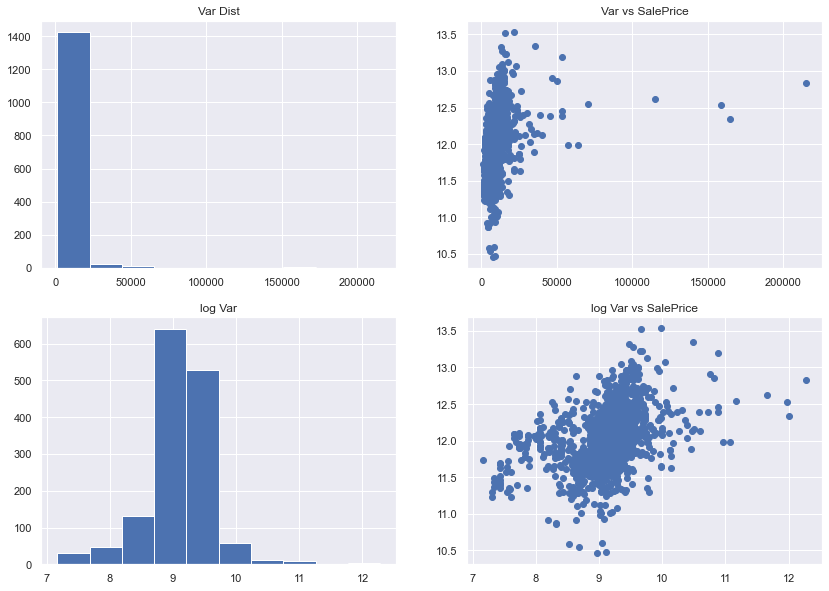

In [134]:
#Lot Area
var = xs['LotArea']
fig, ax = plt.subplots(2,2, figsize=(14,10))
ax[0][0].hist(var)
ax[0][0].set_title('Var Dist')
ax[0][1].scatter(x=var, y=df['SalePrice'])
ax[0][1].set_title('Var vs SalePrice')
ax[1][0].hist(np.log(var))
ax[1][0].set_title('log Var')
ax[1][1].scatter(x=np.log(var), y=df['SalePrice'])
ax[1][1].set_title('log Var vs SalePrice')

## 2.7 Partial Dependence

In [206]:
rf1.fit(xs[final_var_list], y)
m_rmse(rf1, xs[final_var_list], y), rmse(y, rf1.oob_prediction_)

(0.049026, 0.133593)

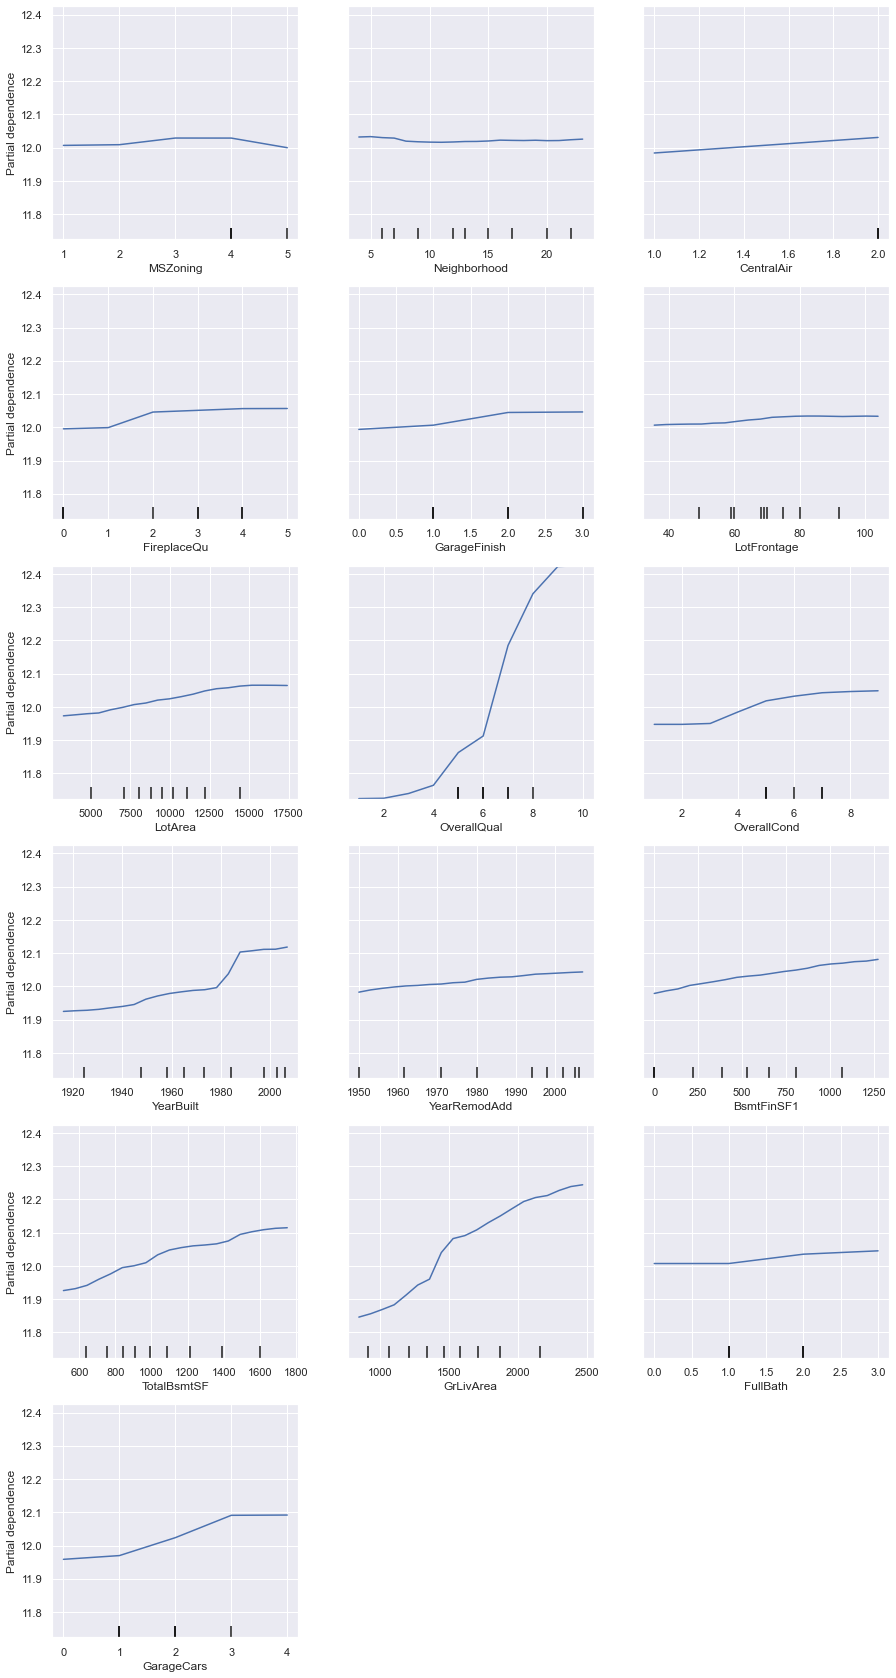

In [211]:
#Partial Dependence Plots - tell the impact of each variable individually if evrything else remain same
fig,ax = plt.subplots(figsize=(15,30))
plot_partial_dependence(rf1, xs[final_var_list], final_var_list, grid_resolution=20, ax=ax)

# 3. Final Feature Engg basis analysis

In [223]:
to.classes['MSZoning']

['#na#', 'C (all)', 'FV', 'RH', 'RL', 'RM']

In [224]:
#Feature addition/changes post univariate/bivariate analysis
def processing_pass2(df):
    #Replacing LotFrontage & LotArea with logs
    df['LotFrontage'] = np.log(df['LotFrontage'])
    df['LotArea'] = np.log(df['LotArea'])
    
    #Very few values in garage cars >3 , hence volatile price
    df.loc[df['GarageCars']>3, 'GarageCars'] = 3
    
    #Seems like SalePrice has ordering as per MSZoning
    df['MSZoning'] = df['MSZoning'].astype('category')
    df['MSZoning'].cat.set_categories(['RM','FV','C (all)','RL','RH'], ordered=True, inplace=True)

    #Outlier capping post looking at the univariate/bivariate plots
    df.loc[df['BsmtFinSF1']>5000, 'BsmtFinSF1'] = 5000
    df.loc[df['TotalBsmtSF']>5000, 'TotalBsmtSF'] = 5000
    df.loc[df['1stFlrSF']>5000, '1stFlrSF'] = 5000
    df.loc[df['GrLivArea']>5000, 'GrLivArea'] = 5000

    df.loc[df['LotFrontage']>5.5, 'LotFrontage'] = 5.5
    df.loc[df['LotArea']>11.5, 'LotArea'] = 11.5
    
    #return df

In [226]:
df1 = processing_pass1(df.copy())
processing_pass2(df1)
cont, cat = cont_cat_split(df1, 1, dep_var='SalePrice')
splitter = RandomSplitter(seed=0)
procs = [Categorify, FillMissing]

In [240]:
to = TabularPandas(df1, procs, cat, cont, y_names='SalePrice', splits=splitter(df))
train_xs, train_y = to.train.xs, to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y 

In [245]:
train_xs_final = train_xs[final_var_list]
valid_xs_final = valid_xs[final_var_list]

# 4. Next Steps

- Understand the cluster_columns function
- Improve notebook comments

# 5. References

- Fastai tabular Ideas: https://github.com/gautapb/fastbook/blob/master/09_tabular.ipynb
- Comprehensive EDA: https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
- Ideas for improvement (not explored yet): https://www.kaggle.com/jesucristo/1-house-prices-solution-top-1?scriptVersionId=20214677
- Partial dependence plots: https://www.kaggle.com/dansbecker/partial-dependence-plots